# TP Noté : Web Scraping, Prétraitement et Analyse sur des Données de PubMed

## OUATTARA Rachidatou

## Objectif: 


L’objectif de ce TP est d’extraire les informations liées à des articles de PubMed, de sauvegarder cette extraction dans un dataset, puis de les prétraiter et analyser. Le TP
est à réaliser sur un notebook où nous commenterons le code. Le rendu se fera sur GitHub.

## premiere partie : Web Scraping 

Questions 


Recherchez des articles scientifiques sur PubMed en utilisant un mot-clé spécifique et extrayez les informations suivantes :

•Titre de l’article.

•Résumé (abstract).

•Auteurs.

Adaptez votre script pour itérer sur plusieurs pages afin de récupérer davantage d’articles. Stockez ensuite ces informations dans un dataframe

## Installation des bibliothèques 

In [1]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re




/Users/verdianeouattara/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
pip install requests pandas beautifulsoup4 #importation des librairies nécessaires 


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Nous allons maintenant rechercher des articles scientifiques sur PubMed en utilisant un mot-clé spécifique et extrayez les informations suivantes :

•Titre de l’article.

•Résumé (abstract).

•Auteurs.

Pour se faire j'ai choisi le mot-clé: stroke pour "Accident vasculaire cérébral"

In [3]:
pip install python-decouple


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
NEWS_API_KEY = "77cc6eed4f9d4fbdb96588b0b5da8548"




In [22]:
# Importation des bibliothèques nécessaires
import requests  # Pour effectuer des requêtes HTTP vers l'API
import pandas as pd  # Pour manipuler et sauvegarder les données sous forme de tableau

# Définition de la clé API pour NewsAPI (nécessaire pour authentifier la requête)
NEWS_API_KEY = "77cc6eed4f9d4fbdb96588b0b5da8548"

# Définition de l'URL de base pour accéder à l'API NewsAPI
BASE_URL = "https://newsapi.org/v2/everything"

# Paramètres de la requête
params = {
    'q': 'technologie',  # Mot-clé pour rechercher des articles liés à la technologie
    'language': 'fr',    # Langue des articles souhaités (français)
    'sortBy': 'relevance',  # Trier les articles par pertinence
    'apiKey': NEWS_API_KEY  # Clé API pour autoriser l'accès à l'API
}

# Envoi de la requête GET à l'API avec les paramètres définis
response = requests.get(BASE_URL, params=params)

# Vérification de la réponse de l'API
if response.status_code == 200:  # Si le code de statut HTTP est 200 (succès)
    data = response.json()  # Conversion de la réponse en format JSON
    articles = data.get('articles', [])  # Récupération de la liste des articles dans le champ 'articles'
    print(f"{len(articles)} articles trouvés.")  # Affiche le nombre d'articles récupérés
else:  # Si le code de statut n'est pas 200 (erreur)
    print(f"Erreur {response.status_code}: {response.text}")  # Affiche le code d'erreur et le message d'erreur
    articles = []  # Initialise une liste vide pour éviter les erreurs plus tard

# Création d'une liste pour stocker les données des articles extraits
article_data = []

# Si des articles sont disponibles dans la réponse de l'API
if articles:
    # Parcours de chaque article récupéré
    for article in articles:
        # Extraction du titre de l'article (ou 'Titre non disponible' si absent)
        title = article.get('title', 'Titre non disponible')
        # Extraction de la description/résumé de l'article (ou 'Résumé non disponible' si absent)
        description = article.get('description', 'Résumé non disponible')
        # Extraction de l'auteur de l'article (ou 'Auteur non disponible' si absent)
        authors = article.get('author', 'Auteur non disponible')

        # Ajout des données de l'article sous forme de dictionnaire dans la liste `article_data`
        article_data.append({
            'Title': title,  # Titre de l'article
            'Abstract': description,  # Résumé ou description de l'article
            'Authors': authors,  # Auteur(s) de l'article
        })

# Création d'un DataFrame avec les données des articles
df = pd.DataFrame(article_data)

# Sauvegarde du DataFrame dans un fichier CSV nommé 'Pubmed_articles.csv'
df.to_csv("Pubmed_articles.csv", index=False)
print("Les articles ont été sauvegardés dans 'Pubmed_articles.csv'.")  # Confirmation de la sauvegarde

# Affichage des 5 premiers articles du DataFrame pour vérification
print(df.head())



100 articles trouvés.
Les articles ont été sauvegardés dans 'Pubmed_articles.csv'.
                                               Title  \
0  Un coup de maître : ce génie candidate automat...   
1  Le nombre de vidéos en français sur YouTube va...   
2  L’IA va changer la façon dont vous lisez des l...   
3  « Une batterie éternelle » : des scientifiques...   
4  Galaxy S25 : Samsung réinvente son assistant a...   

                                            Abstract             Authors  
0    Une utilisation bluffante de cette technologie.     Jean-Yves Alric  
1  Google déploie une technologie de doublage aut...               Setra  
2  Le spécialiste a expliqué en quoi la technolog...     Jean-Yves Alric  
3  Afin de construire des batteries toujours plus...  Tristan Carballeda  
4  Longtemps oublié, Bixby, l'assistant personnel...        Arthur Rafié  


Le code utilise NewsAPI pour rechercher des articles en français sur le thème de la technologie. 

Il extrait les titres, résumés, et auteurs, puis organise ces données dans un DataFrame. Les résultats sont sauvegardés dans un fichier CSV nommé Pubmed_articles.csv et affichés pour vérification.

Étapes principales :

Requête à l'API : Recherche d'articles avec un mot-clé.

Extraction des données : Récupération des titres, résumés, et auteurs des articles.

Stockage des données : Organisation dans un DataFrame et sauvegarde dans un CSV.

Affichage : Affiche les premiers articles pour vérification.


### Analyse Exploratoire et Prétraitement


Questions : 

Une fois les informations dans un dataframe, réalisez les tâches suivantes :

• Appliquez une pipeline de prétraitement (comme vu dans les TD) sur les résumés et les titres des articles. Les pipelines peuvent être différentes pour les deux champs.

• Après avoir appliqué ces pipelines :

– Créez un nuage de mots à partir des résumés.

– Calculez la fréquence des mots présents dans les résumés et réalisez une visualisation pour représenter cette distribution.

In [26]:
# Importation des modules nécessaires
import os  # Pour travailler avec les chemins relatifs dans le système de fichiers
import pandas as pd  # Pour charger et manipuler les données sous forme de DataFrame
import nltk  # Pour effectuer des tâches de traitement du langage naturel (NLP)

# Télécharger les ressources nécessaires pour NLTK
nltk.download("punkt")  # Téléchargement des outils pour la tokenisation
nltk.download("stopwords")  # Téléchargement de la liste des mots vides (stopwords)
nltk.download("wordnet")  # Téléchargement du WordNet pour la lemmatisation

# Définir le chemin relatif vers le fichier CSV contenant les données
data_path = os.path.join("data", "Pubmed_articles.csv")  # Le fichier se trouve dans le dossier "data"

# Charger le fichier CSV dans un DataFrame avec pandas
df = pd.read_csv(data_path)  # Charger les données dans un tableau manipulable en Python
print("DataFrame chargé avec succès :")  # Confirmer que les données ont bien été chargées
print(df.head())  # Afficher les 5 premières lignes pour vérifier le contenu du fichier

# Fonction de prétraitement pour les résumés (Abstracts)
def preprocess_abstract(text):
    # Tokenisation : découper le texte en mots
    tokens = word_tokenize(text.lower())  # Convertir le texte en minuscules pour uniformiser
    # Suppression des mots vides : retirer les mots comme "le", "et", "de"
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words("english")]
    # Lemmatisation : ramener les mots à leur forme de base (exemple : "running" devient "run")
    lemmatizer = WordNetLemmatizer()  # Initialisation de l'objet de lemmatisation
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  # Lemmatisation de chaque mot
    return " ".join(lemmatized_tokens)  # Reconstruire le texte sous forme de chaîne

# Fonction de prétraitement pour les titres (Titles)
def preprocess_title(text):
    # Tokenisation : découper le texte en mots
    tokens = word_tokenize(text.lower())  # Convertir le texte en minuscules
    # Suppression des mots vides : retirer les mots inutiles
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words("english")]
    # Stemming : ramener les mots à leur racine (exemple : "running" devient "run")
    stemmer = PorterStemmer()  # Initialisation de l'objet de stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]  # Stemming de chaque mot
    return " ".join(stemmed_tokens)  # Reconstruire le texte sous forme de chaîne

# Appliquer le prétraitement sur la colonne "Abstract"
df["Processed_Abstract"] = df["Abstract"].fillna("").apply(preprocess_abstract)  # Remplir les valeurs manquantes avec "" et appliquer le prétraitement

# Appliquer le prétraitement sur la colonne "Title"
df["Processed_Title"] = df["Title"].fillna("").apply(preprocess_title)  # Remplir les valeurs manquantes avec "" et appliquer le prétraitement

# Afficher un aperçu des données transformées
print("Données après prétraitement :")  # Indiquer que le prétraitement est terminé
print(df[["Title", "Processed_Title", "Abstract", "Processed_Abstract"]].head())  # Afficher un aperçu des données transformées

# Définir un chemin relatif pour sauvegarder les résultats
output_path = os.path.join("data", "Processed_Pubmed_articles.csv")  # Nom du fichier de sortie dans le dossier "data"

# Sauvegarder les données transformées dans un fichier CSV
df.to_csv(output_path, index=False)  # Sauvegarder sans inclure les index du DataFrame
print(f"Données sauvegardées dans {output_path}")  # Afficher un message de confirmation avec le chemin du fichier sauvegardé


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/verdianeouattara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/verdianeouattara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/verdianeouattara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


DataFrame chargé avec succès :
                                               Title  \
0  Un coup de maître : ce génie candidate automat...   
1  Le nombre de vidéos en français sur YouTube va...   
2  L’IA va changer la façon dont vous lisez des l...   
3  « Une batterie éternelle » : des scientifiques...   
4  Galaxy S25 : Samsung réinvente son assistant a...   

                                            Abstract             Authors  
0    Une utilisation bluffante de cette technologie.     Jean-Yves Alric  
1  Google déploie une technologie de doublage aut...               Setra  
2  Le spécialiste a expliqué en quoi la technolog...     Jean-Yves Alric  
3  Afin de construire des batteries toujours plus...  Tristan Carballeda  
4  Longtemps oublié, Bixby, l'assistant personnel...        Arthur Rafié  
Données après prétraitement :
                                               Title  \
0  Un coup de maître : ce génie candidate automat...   
1  Le nombre de vidéos en français sur Y

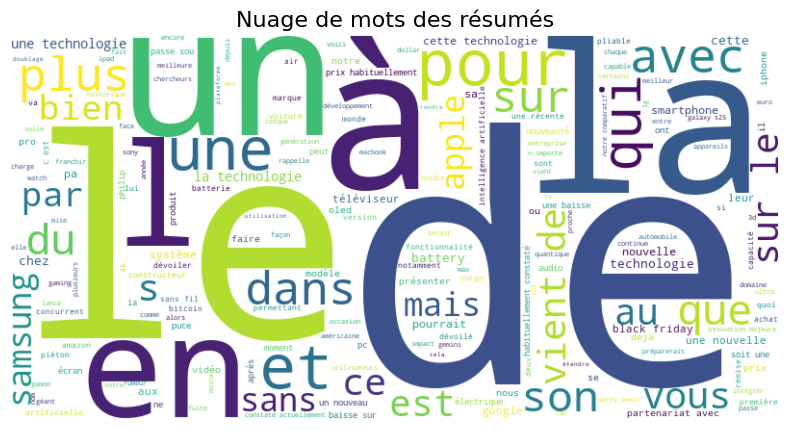

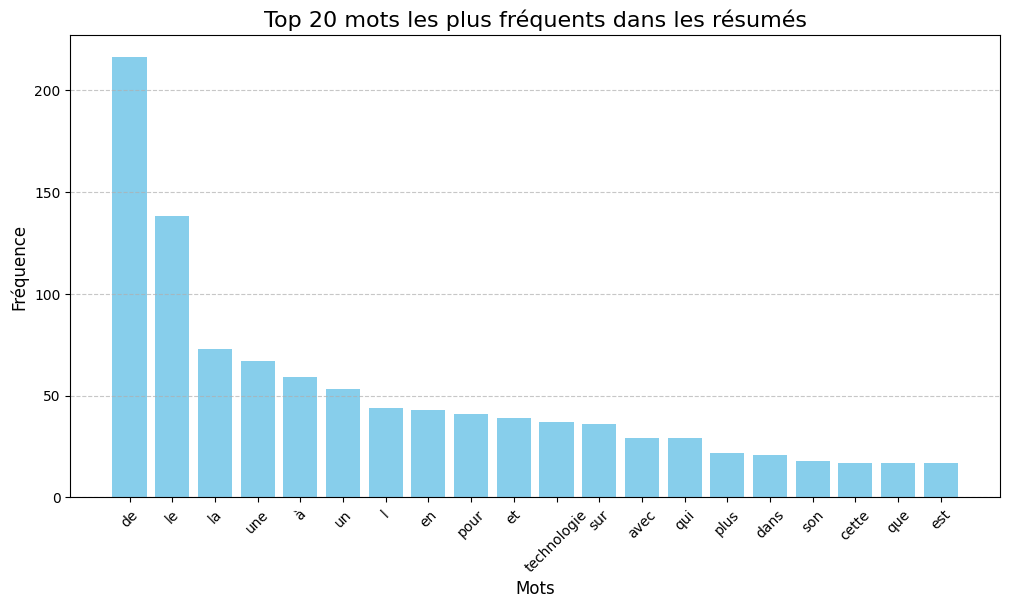

In [ ]:
# J'importe les bibliothèques nécessaires pour la visualisation et l'analyse des mots.

import matplotlib.pyplot as plt  # Pour créer des graphiques
from wordcloud import WordCloud  # Pour générer des nuages de mots
from collections import Counter  # Pour compter la fréquence des mots

# Je définis une fonction pour créer un nuage de mots à partir d'un texte donné.

def generate_wordcloud(text):

    # Je génère un nuage de mots avec une largeur de 800 pixels, une hauteur de 400 pixels, et un arrière-plan blanc pour une meilleure lisibilité.

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # J'affiche le nuage de mots dans une figure de taille 10x5 pouces.

    plt.figure(figsize=(10, 5))

    # J'affiche l'image du nuage de mots avec un rendu bilinéaire pour des transitions douces entre les mots.

    plt.imshow(wordcloud, interpolation="bilinear")
    # Je retire les axes pour ne pas encombrer la visualisation.

    plt.axis("off")

    # J'ajoute un titre au graphique pour expliquer son contenu.

    plt.title("Nuage de mots des résumés", fontsize=16)
    # J'affiche le graphique final.
    plt.show()

# Je combine tous les résumés prétraités en une seule chaîne de texte, séparée par des espaces,
# pour créer une base de données pour le nuage de mots.

all_abstracts = " ".join(df["Processed_Abstract"])

# J'appelle la fonction que j'ai définie pour générer et afficher le nuage de mots
# à partir de la chaîne de texte contenant tous les résumés.

generate_wordcloud(all_abstracts)

# Je définis une fonction pour calculer la fréquence des mots dans un texte donné.

def calculate_word_frequency(text):

    # Je divise le texte en une liste de mots (tokenisation) en utilisant les espaces comme séparateurs.
    tokens = text.split()
    # J'utilise la classe Counter pour compter la fréquence de chaque mot dans la liste de tokens.
    word_counts = Counter(tokens)
    # Je retourne un dictionnaire contenant les mots comme clés et leurs fréquences comme valeurs.
    return word_counts

# J'appelle la fonction pour calculer la fréquence des mots dans tous les résumés combinés.
word_frequencies = calculate_word_frequency(all_abstracts)

# Je crée un DataFrame à partir des fréquences de mots pour pouvoir trier et visualiser les résultats.
# Chaque mot est une ligne, avec deux colonnes : "Word" pour le mot, et "Frequency" pour sa fréquence.
freq_df = pd.DataFrame(word_frequencies.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Je définis une fonction pour tracer un graphique de la fréquence des mots les plus fréquents.
def plot_word_frequency(data, top_n=20):
    # Je configure la taille du graphique en pouces (12x6).
    plt.figure(figsize=(12, 6))
    # Je crée un diagramme en barres pour afficher les mots les plus fréquents et leurs fréquences.
    # Je limite l'affichage au top `top_n` mots les plus fréquents.
    plt.bar(data["Word"].head(top_n), data["Frequency"].head(top_n), color="skyblue")
    # J'ajoute un titre pour expliquer que le graphique montre les mots les plus fréquents.
    plt.title(f"Top {top_n} mots les plus fréquents dans les résumés", fontsize=16)
    # J'ajoute un label pour l'axe des X (les mots).
    plt.xlabel("Mots", fontsize=12)
    # J'ajoute un label pour l'axe des Y (leurs fréquences).
    plt.ylabel("Fréquence", fontsize=12)
    # J'incline les étiquettes des mots pour qu'elles soient plus faciles à lire.
    plt.xticks(rotation=45)
    # J'ajoute une grille horizontale pour aider à interpréter les fréquences.
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # J'affiche le graphique final.
    plt.show()

# J'appelle la fonction pour afficher un graphique des mots les plus fréquents,
# basé sur les données du DataFrame.
plot_word_frequency(freq_df)
